In this notebook we make linear models for four clusters with unimodal fire season and a high correlation with one climate index.

We use the functions defined in the file "scripts/lm_modelling_functions_new.R".

In [1]:
setwd("..")

In [2]:
source("scripts/modelling_functions_new.R")

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews(

In [3]:
# Data required
load('fireSeasonPer75_def.Rdata', verbose = T)
load("data/ba_mon_time_series_masked.Rdata", verbose = T)
load("data/ba_mon_clim_masked_df.Rdata", verbose = T)
load('corrDfAnnualClus.Rdata', verbose = T)
load('corrDfAnnualClusLag1.Rdata', verbose = T)
load('corrDfAnnualClusLag2.Rdata', verbose = T)

Loading objects:
  fireSeasonPer75_def
Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  df_masked
  masked_coords
Loading objects:
  corr.df
Loading objects:
  corr.df.lag.1
Loading objects:
  corr.df.lag.2


## Climate indexes data loading

In [4]:
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

In [5]:
nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [6]:
poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [7]:
ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)
ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [8]:
eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [9]:
pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [10]:
scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [11]:
wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

## Resultados antiguos obtenidos con el fichero "modelling_functions.R"

For comparison reasons only

In [27]:
# Clusters that have a linear and a random forest models
table[-which(is.na(table$lm.R2)),]

,biome,cluster,lm.Npred,lm.RMSE,lm.R2,lm.MAE,lm.RVar,lm.Rp90,rf.mtry,rf.ntree,rf.RMSE,rf.R2,rf.MAE,rf.RVar,rf.Rp90
2,1,1,1,611.61022,0.119517294,446.309525,0.2659278,0.9799070,3,120,613.53071,0.1080653203,437.72265,0.13715055,0.9580862
7,1,6,1,2287.72216,0.199140791,1922.040622,0.3417525,0.9410253,3,120,2495.73945,0.0467549373,2139.97293,0.11026688,0.9018471
8,1,7,1,1098.47171,0.160623473,821.374171,0.3450909,0.9458061,3,40,1247.20621,0.0052878637,955.87381,0.08683104,0.8882295
11,1,10,2,2153.29564,0.188631116,1712.160375,0.4794496,0.9030738,3,40,2307.40524,0.0361566009,1920.77901,0.15056784,0.8833276
14,1,13,1,1395.62517,0.157195659,1151.452524,0.3111555,0.9036550,3,60,1538.52195,0.0036762246,1253.07172,0.09101707,0.8504334
16,2,1,1,417.28199,0.132097699,349.018858,0.3405630,0.9187229,3,100,397.41201,0.1736627318,321.72542,0.12131651,0.8896367
18,2,3,1,538.21883,0.208572669,426.552563,0.3490131,0.9363016,3,120,572.71706,0.0853524548,488.10072,0.12179957,0.9081988
19,2,4,1,963.46153,0.120135067,737.258396,0.2492008,0.9459738,3,160,1091.45764,0.0093936633,885.88231,0.09547201,0.9247957
20,2,5,1,880.00026,0.254900974,697.186375,0.3998817,0.9193728,3,60,1019.11700,0.0211587452,838.76285,0.12257111,0.8991184
21,2,6,1,879.21591,0.177848086,728.289025,0.3068498,0.7807753,3,40,1007.19063,0.0064315666,827.50847,0.16746662,0.7875102


## Biome 2, cluster 4

This one has a significant correlation of -0.5 with the 'ea' index. Red points are the predicted ones.

        RMSE       bias      RVar cor.pvalue       cor    acc.t1    acc.t2
cor 11.20223 0.01159078 0.2492008  0.1460115 0.3466051 0.3333333 0.8333333
       acc.t3
cor 0.1428571


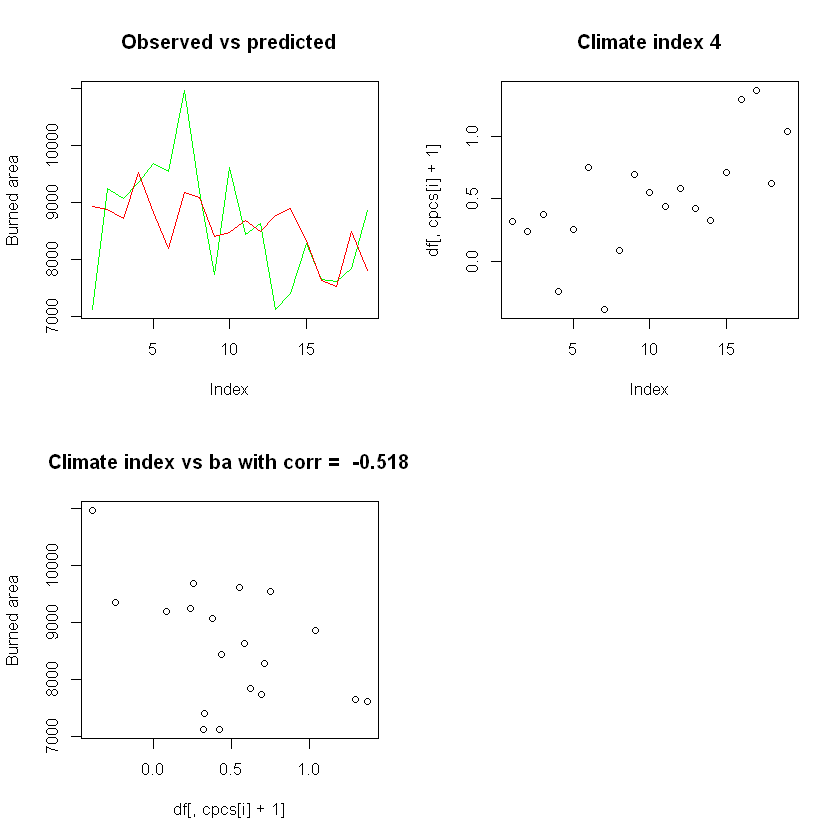

In [12]:
t = lm.clus.plot(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df, 
                 list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 2, 4)

## Biome 2, cluster 3

This one has a significant correlation of 0.6 with the 'pna' index. Red points are the predicted ones.

        RMSE      bias      RVar cor.pvalue       cor    acc.t1    acc.t2
cor 8.211024 0.0152052 0.3490131 0.04934211 0.4566976 0.1666667 0.8333333
       acc.t3
cor 0.5714286


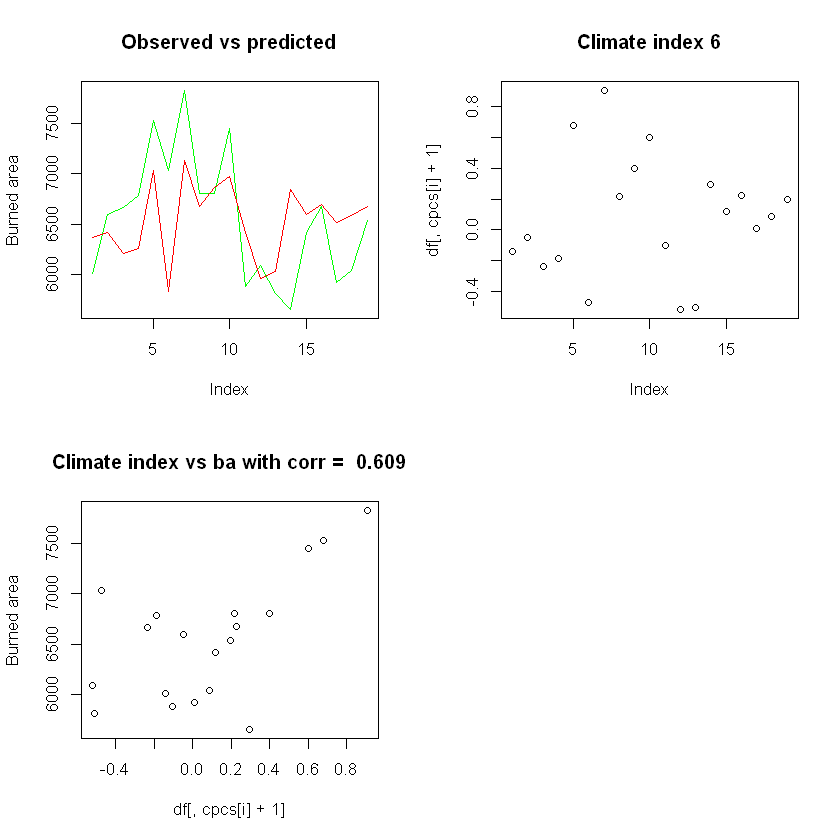

In [13]:
t = lm.clus.plot(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df, 
                 list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 2, 3)

In [29]:
#series = data.frame(ba = df$df[,1], nina34 = df$df[,2], nao = df$df[,3], poleur = df$df[,4], ea = df$df[,5], eawr = df$df[,6],
                    #pna = df$df[,7], scand = df$df[,8], wp = df$df[,9])
#series
# save(series, file = 'seriesBioma2Cluster3.Rdata')

ba,nina34,nao,poleur,ea,eawr,pna,scand,wp
6015.498,-0.18651041,-0.02000,0.01625,0.36250,0.00875,-0.13875,-0.26250,0.28125
6595.819,0.95691947,-0.01750,0.25375,0.17375,0.18125,-0.04750,0.62125,-0.85500
6664.188,0.12658800,-0.00375,-0.21250,0.43000,-0.23250,-0.23625,-0.01000,-0.29625
6786.316,0.57623594,0.20375,-0.45375,-0.37375,-0.16000,-0.18625,-0.29125,0.63500
7530.203,0.01348637,-0.21250,0.17000,0.51250,-0.65875,0.68125,-0.07625,-0.07375
7030.719,0.36796343,-0.38750,-0.10625,0.83875,-0.27250,-0.47500,0.29500,-0.33500
7824.254,-0.83063798,0.14500,-0.01375,-0.31875,-0.33375,0.90625,-0.21000,-0.11875
6806.843,-0.48719523,-0.70875,0.22000,0.06750,-0.28875,0.21750,0.13625,-0.29375
6803.031,0.62864889,-0.16125,-0.25000,0.69250,0.35000,0.40125,-0.19125,-0.29125
7446.640,-1.02787618,-0.97750,0.33875,0.25250,-1.11125,0.60000,0.10375,-0.41000


## Biome 11, cluster 31

This one has a significant correlation of -0.6 with the 'eawr' index. Red points are the predicted ones.

        RMSE     bias      RVar cor.pvalue       cor    acc.t1    acc.t2
cor 83.97864 6.284733 0.4164586 0.02746366 0.5049073 0.1666667 0.8333333
       acc.t3
cor 0.5714286


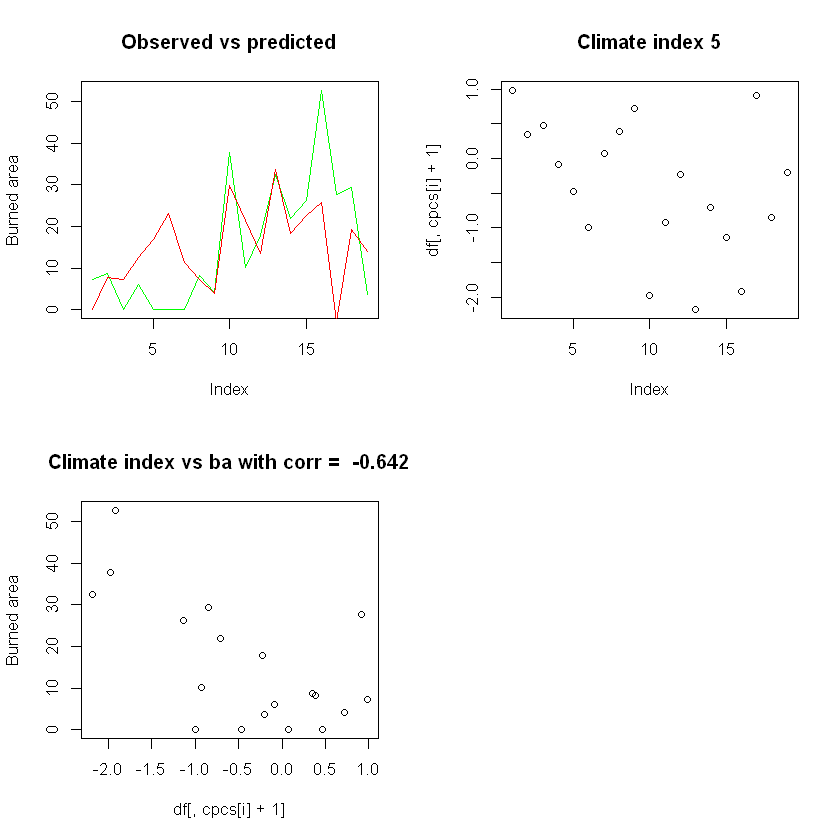

In [14]:
t = lm.clus.plot(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df, 
                 list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 11, 31)

## Biome 5, cluster 1

This one has a significant correlation of -0.65 with the 'nina34' index. Red points are the predicted ones.

       RMSE       bias      RVar cor.pvalue       cor    acc.t1    acc.t2
cor 18.4422 0.09692525 0.5018555 0.01843458 0.5484522 0.8333333 0.3333333
       acc.t3
cor 0.6666667


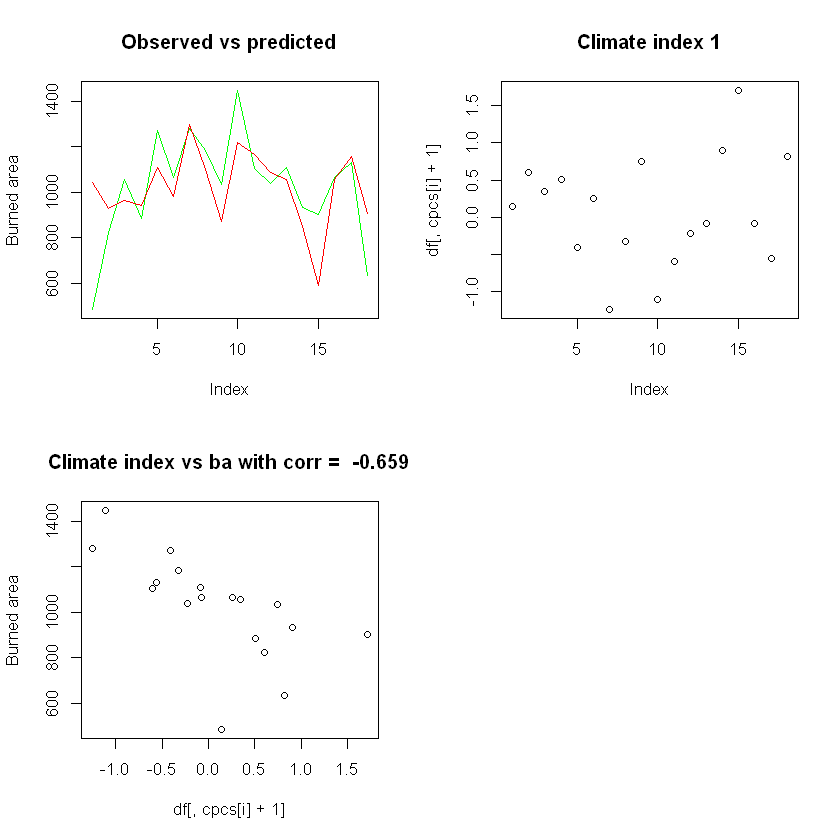

In [15]:
t = lm.clus.plot(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df, 
                 list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 5, 1)

## Models for all the clusters

In [16]:
lm.list <- lm.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df, 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal')

In [17]:
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,1,6.839691,0.011179855,0.2659278,0.14712217,0.3457127,0.5000000,0.5000000,0.4285714
3,1,2,0,NA,NA,NA,NA,NA,NA,NA,NA
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,NA
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,1,15.426281,0.006749490,0.3417525,0.05547053,0.4462519,0.5000000,0.6666667,0.2857143
8,1,7,1,23.746449,0.021355105,0.3450909,0.08903802,0.4007786,0.3333333,0.3333333,0.5714286
9,1,8,0,NA,NA,NA,NA,NA,NA,NA,NA
10,1,9,0,NA,NA,NA,NA,NA,NA,NA,NA
11,1,10,2,16.815977,0.007856959,0.4794496,0.05568766,0.4343168,0.5714286,0.0000000,0.2857143


In [18]:
rf.list <- rf.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df, list(nina34, nao, poleur, ea, eawr, pna, scand, wp),
                  mode = 'unimodal')

In [19]:
rf.list$results

,biome,cluster,rf.Ntree,rf.RMSE,rf.bias,rf.RVar,rf.cor.pvalue,rf.cor,rf.acc.t1,rf.acc.t2,rf.acc.t3
2,1,1,120,6.861168,0.011065635,0.13715055,0.16938389,0.32873290,0.6666667,0.5000000,0.1428571
3,1,2,100,10.238028,0.008469694,0.14010102,0.35833820,0.22320401,0.5000000,0.5000000,0.5714286
4,1,3,140,27.135664,0.029564405,0.06961403,0.23391577,-0.28676710,0.0000000,0.8333333,0.1428571
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,40,16.546418,0.006700425,0.11808657,0.28987962,0.25611833,0.1666667,0.8333333,0.1428571
8,1,7,100,27.937151,0.021659469,0.07480232,0.29624616,-0.25287324,0.0000000,0.8333333,0.0000000
9,1,8,20,15.610951,0.009327377,0.11062342,0.13285147,-0.35755775,0.3333333,0.8333333,0.0000000
10,1,9,20,13.453036,0.007072023,0.14379171,0.39168779,0.20848992,0.1666667,0.6666667,0.5714286
11,1,10,40,18.326921,0.007756458,0.15550033,0.54780484,0.14290848,0.4285714,0.3333333,0.2857143


In [20]:
knn.list <- knn.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df, list(nina34, nao, poleur, ea, eawr, pna, scand, wp),
                  mode = 'unimodal')

In [21]:
knn.list$results

,biome,cluster,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,10.213884,0.011030013,1.4712073,0.417110708,0.19773313,0.6666667,0.0000000,0.4285714
3,1,2,17.229993,0.008604094,1.4608101,0.638321007,-0.11530325,0.0000000,0.0000000,0.5714286
4,1,3,31.430387,0.029108360,0.8730840,0.621507385,0.12106698,0.0000000,0.3333333,0.4285714
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,17.122205,0.006453111,1.2860722,0.007757324,0.59060297,0.6666667,0.1666667,0.5714286
8,1,7,36.448259,0.018741244,0.5368383,0.479806118,-0.17260327,0.5000000,0.0000000,0.0000000
9,1,8,17.198856,0.008862631,0.5362195,0.866684442,0.04129990,0.5000000,0.3333333,0.1428571
10,1,9,22.761157,0.006860229,1.5280014,0.602418005,-0.12768611,0.5000000,0.0000000,0.1428571
11,1,10,27.173134,0.007763237,1.0152797,0.560190752,-0.13855450,0.1428571,0.0000000,0.4285714


In [26]:
save(table, file = 'models_results_per_cluster.Rdata')

In [23]:
table = cbind(lm.list$results, rf.list$results[,-c(1,2)], knn.list$results[,-c(1,2)])
table

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc.t1,lm.acc.t2,...,rf.acc.t2,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,1,6.839691,0.011179855,0.2659278,0.14712217,0.3457127,0.5000000,0.5000000,...,0.5000000,0.1428571,10.213884,0.011030013,1.4712073,0.417110708,0.19773313,0.6666667,0.0000000,0.4285714
3,1,2,0,NA,NA,NA,NA,NA,NA,NA,...,0.5000000,0.5714286,17.229993,0.008604094,1.4608101,0.638321007,-0.11530325,0.0000000,0.0000000,0.5714286
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,...,0.8333333,0.1428571,31.430387,0.029108360,0.8730840,0.621507385,0.12106698,0.0000000,0.3333333,0.4285714
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,1,15.426281,0.006749490,0.3417525,0.05547053,0.4462519,0.5000000,0.6666667,...,0.8333333,0.1428571,17.122205,0.006453111,1.2860722,0.007757324,0.59060297,0.6666667,0.1666667,0.5714286
8,1,7,1,23.746449,0.021355105,0.3450909,0.08903802,0.4007786,0.3333333,0.3333333,...,0.8333333,0.0000000,36.448259,0.018741244,0.5368383,0.479806118,-0.17260327,0.5000000,0.0000000,0.0000000
9,1,8,0,NA,NA,NA,NA,NA,NA,NA,...,0.8333333,0.0000000,17.198856,0.008862631,0.5362195,0.866684442,0.04129990,0.5000000,0.3333333,0.1428571
10,1,9,0,NA,NA,NA,NA,NA,NA,NA,...,0.6666667,0.5714286,22.761157,0.006860229,1.5280014,0.602418005,-0.12768611,0.5000000,0.0000000,0.1428571
11,1,10,2,16.815977,0.007856959,0.4794496,0.05568766,0.4343168,0.5714286,0.0000000,...,0.3333333,0.2857143,27.173134,0.007763237,1.0152797,0.560190752,-0.13855450,0.1428571,0.0000000,0.4285714


In [24]:
# Clusters that have a linear, a random forest and a knn models
table1 <- table[-which(is.na(table$lm.RMSE)),]
table1

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc.t1,lm.acc.t2,...,rf.acc.t2,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,1,6.839691,0.011179855,0.2659278,0.1471221653,0.34571273,0.5000000,0.5000000,...,0.5000000,0.1428571,10.213884,0.011030013,1.4712073,0.417110708,0.197733129,0.6666667,0.0000000,0.4285714
7,1,6,1,15.426281,0.006749490,0.3417525,0.0554705349,0.44625194,0.5000000,0.6666667,...,0.8333333,0.1428571,17.122205,0.006453111,1.2860722,0.007757324,0.590602966,0.6666667,0.1666667,0.5714286
8,1,7,1,23.746449,0.021355105,0.3450909,0.0890380196,0.40077858,0.3333333,0.3333333,...,0.8333333,0.0000000,36.448259,0.018741244,0.5368383,0.479806118,-0.172603267,0.5000000,0.0000000,0.0000000
11,1,10,2,16.815977,0.007856959,0.4794496,0.0556876635,0.43431684,0.5714286,0.0000000,...,0.3333333,0.2857143,27.173134,0.007763237,1.0152797,0.560190752,-0.138554504,0.1428571,0.0000000,0.4285714
14,1,13,1,21.262815,0.015197798,0.3111555,0.0928447033,0.39647908,0.3333333,0.6666667,...,1.0000000,0.2857143,31.980651,0.014867237,1.0408154,0.863518694,0.042289344,0.0000000,0.0000000,0.2857143
16,2,1,1,14.947212,0.035852251,0.3405630,0.1381940439,0.36345247,0.3333333,0.6666667,...,1.0000000,0.1666667,20.083522,0.039880928,0.4494079,0.336980156,0.240217320,0.1666667,0.5000000,0.6666667
18,2,3,1,8.211024,0.015205198,0.3490131,0.0493421131,0.45669757,0.1666667,0.8333333,...,1.0000000,0.2857143,9.168882,0.015310423,0.6772077,0.084770159,0.405761963,0.3333333,0.1666667,0.5714286
19,2,4,1,11.202225,0.011590783,0.2492008,0.1460115362,0.34660506,0.3333333,0.8333333,...,1.0000000,0.0000000,14.615575,0.011354087,0.9327494,0.355219981,0.224618710,0.5000000,0.1666667,0.5714286
20,2,5,1,11.687553,0.013299035,0.3998817,0.0274744018,0.50487719,0.3333333,0.8333333,...,1.0000000,0.2857143,16.323014,0.013035855,1.1366601,0.189826524,0.314434347,0.6666667,0.3333333,0.4285714
21,2,6,1,28.895585,0.032670894,0.3068498,0.0721124006,0.42172039,0.1666667,0.5000000,...,0.8333333,0.4285714,44.708112,0.033605367,1.1930788,0.727060260,0.085748654,0.6666667,0.1666667,0.4285714


In [25]:
colMeans(table1[,-c(1,2,3,12)])

lm.RMSE        lm.bias        lm.RVar  lm.cor.pvalue         lm.cor 
    36.8154362      0.7613807      0.3676816      0.1194960      0.4145736 
     lm.acc.t1      lm.acc.t2      lm.acc.t3        rf.RMSE        rf.bias 
     0.3388704      0.5620155      0.4579181     38.7194734      0.7583679 
       rf.RVar  rf.cor.pvalue         rf.cor      rf.acc.t1      rf.acc.t2 
     0.1366206      0.4119436      0.2038028      0.1688815      0.7519380 
     rf.acc.t3       knn.RMSE       knn.bias       knn.RVar knn.cor.pvalue 
     0.2325581     52.9233535      0.6633839      0.9548034      0.4498502 
       knn.cor     knn.acc.t1     knn.acc.t2     knn.acc.t3 
     0.1090925      0.3715393      0.2364341      0.4645626

## Con persistencia de un mes

In [27]:
#load('corrDfAnnualClusLag1.Rdata', verbose = T)

for (i in 3:dim(corr.df.lag.1)[2]){
    names(corr.df.lag.1)[names(corr.df.lag.1) == names(corr.df.lag.1)[i]] <- paste(names(corr.df.lag.1)[i], '.lag1', sep = '')
}
#names(corr.df.lag.1)

lm.list <- lm.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, cbind(corr.df, corr.df.lag.1[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 1)

In [28]:
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,1,6.839691,0.011179855,0.2659278,0.14712217,0.34571273,0.5000000,0.5000000,0.4285714
3,1,2,1,9.412035,0.008465760,0.2897392,0.06309536,0.43441069,0.3333333,0.5000000,0.5714286
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,NA
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,2,16.172826,0.006771533,0.3950600,0.09577408,0.39325715,0.3333333,0.6666667,0.2857143
8,1,7,2,22.871206,0.021323256,0.4858866,0.03546016,0.48466591,0.3333333,0.6666667,0.4285714
9,1,8,0,NA,NA,NA,NA,NA,NA,NA,NA
10,1,9,0,NA,NA,NA,NA,NA,NA,NA,NA
11,1,10,2,16.815977,0.007856959,0.4794496,0.05568766,0.43431684,0.5714286,0.0000000,0.2857143


In [29]:
rf.list <- rf.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, cbind(corr.df, corr.df.lag.1[,-c(1,2)]),
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp),
                  mode = 'unimodal', t = 1)

In [30]:
rf.list$results

,biome,cluster,rf.Ntree,rf.RMSE,rf.bias,rf.RVar,rf.cor.pvalue,rf.cor,rf.acc.t1,rf.acc.t2,rf.acc.t3
2,1,1,60,7.035524,0.011124341,0.07489891,0.37517820,0.21568223,0.3333333,0.3333333,0.0000000
3,1,2,120,9.982157,0.008497827,0.09474518,0.25390093,0.27533982,0.1666667,0.8333333,0.5714286
4,1,3,200,26.489993,0.028981833,0.05443443,0.30642587,-0.24777135,0.0000000,0.5000000,0.0000000
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,60,16.384582,0.006649424,0.07640206,0.23563913,0.28575766,0.1666667,1.0000000,0.0000000
8,1,7,10,27.101894,0.021639482,0.16128733,0.92109484,0.02437635,0.1666667,0.6666667,0.1428571
9,1,8,80,15.735118,0.009232734,0.09370395,0.06351485,-0.43379118,0.3333333,0.6666667,0.0000000
10,1,9,200,14.649724,0.007073272,0.04300229,0.19923713,-0.30819876,0.0000000,0.8333333,0.1428571
11,1,10,20,17.092813,0.007621561,0.12621123,0.15272538,0.33197475,1.0000000,0.1666667,0.2857143


In [31]:
knn.list <- knn.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, cbind(corr.df, corr.df.lag.1[,-c(1,2)]),
                    list(nina34, nao, poleur, ea, eawr, pna, scand, wp),
                  mode = 'unimodal', t = 1)

In [32]:
knn.list$results

,biome,cluster,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,10.770124,0.011065450,1.7562304,0.4181940558,0.197282735,0.5000000,0.0000000,0.7142857
3,1,2,17.925223,0.008761974,1.6133456,0.6607326325,-0.107709469,0.0000000,0.1666667,0.7142857
4,1,3,37.760384,0.027192905,0.9756022,0.4828617315,-0.171422546,0.3333333,0.5000000,0.5714286
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,18.193925,0.006361864,1.2515751,0.0156524009,0.545721721,0.6666667,0.1666667,0.4285714
8,1,7,34.840512,0.020566385,0.8312572,0.9665853563,-0.010310287,0.3333333,0.1666667,0.4285714
9,1,8,18.940791,0.009042414,0.7268478,0.6458821913,-0.112730304,0.3333333,0.3333333,0.0000000
10,1,9,27.892585,0.007411911,1.7074467,0.0225120477,-0.519893421,0.0000000,0.0000000,0.4285714
11,1,10,29.193797,0.007520672,1.0745135,0.2741479310,-0.256937176,0.5714286,0.1666667,0.0000000


In [33]:
table = cbind(lm.list$results, rf.list$results[,-c(1,2)], knn.list$results[,-c(1,2)])
table

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc.t1,lm.acc.t2,...,rf.acc.t2,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,1,6.839691,0.011179855,0.2659278,0.14712217,0.34571273,0.5000000,0.5000000,...,0.3333333,0.0000000,10.770124,0.011065450,1.7562304,0.4181940558,0.197282735,0.5000000,0.0000000,0.7142857
3,1,2,1,9.412035,0.008465760,0.2897392,0.06309536,0.43441069,0.3333333,0.5000000,...,0.8333333,0.5714286,17.925223,0.008761974,1.6133456,0.6607326325,-0.107709469,0.0000000,0.1666667,0.7142857
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,...,0.5000000,0.0000000,37.760384,0.027192905,0.9756022,0.4828617315,-0.171422546,0.3333333,0.5000000,0.5714286
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,2,16.172826,0.006771533,0.3950600,0.09577408,0.39325715,0.3333333,0.6666667,...,1.0000000,0.0000000,18.193925,0.006361864,1.2515751,0.0156524009,0.545721721,0.6666667,0.1666667,0.4285714
8,1,7,2,22.871206,0.021323256,0.4858866,0.03546016,0.48466591,0.3333333,0.6666667,...,0.6666667,0.1428571,34.840512,0.020566385,0.8312572,0.9665853563,-0.010310287,0.3333333,0.1666667,0.4285714
9,1,8,0,NA,NA,NA,NA,NA,NA,NA,...,0.6666667,0.0000000,18.940791,0.009042414,0.7268478,0.6458821913,-0.112730304,0.3333333,0.3333333,0.0000000
10,1,9,0,NA,NA,NA,NA,NA,NA,NA,...,0.8333333,0.1428571,27.892585,0.007411911,1.7074467,0.0225120477,-0.519893421,0.0000000,0.0000000,0.4285714
11,1,10,2,16.815977,0.007856959,0.4794496,0.05568766,0.43431684,0.5714286,0.0000000,...,0.1666667,0.2857143,29.193797,0.007520672,1.0745135,0.2741479310,-0.256937176,0.5714286,0.1666667,0.0000000


In [34]:
# Clusters that have a linear, a random forest and a knn models
table1 <- table[-which(is.na(table$lm.RMSE)),]
table1

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc.t1,lm.acc.t2,...,rf.acc.t2,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,1,6.839691,0.011179855,0.2659278,0.1471221653,0.34571273,0.5000000,0.5000000,...,0.3333333,0.0000000,10.770124,0.011065450,1.7562304,0.418194056,1.972827e-01,0.5000000,0.0000000,0.7142857
3,1,2,1,9.412035,0.008465760,0.2897392,0.0630953582,0.43441069,0.3333333,0.5000000,...,0.8333333,0.5714286,17.925223,0.008761974,1.6133456,0.660732632,-1.077095e-01,0.0000000,0.1666667,0.7142857
7,1,6,2,16.172826,0.006771533,0.3950600,0.0957740809,0.39325715,0.3333333,0.6666667,...,1.0000000,0.0000000,18.193925,0.006361864,1.2515751,0.015652401,5.457217e-01,0.6666667,0.1666667,0.4285714
8,1,7,2,22.871206,0.021323256,0.4858866,0.0354601634,0.48466591,0.3333333,0.6666667,...,0.6666667,0.1428571,34.840512,0.020566385,0.8312572,0.966585356,-1.031029e-02,0.3333333,0.1666667,0.4285714
11,1,10,2,16.815977,0.007856959,0.4794496,0.0556876635,0.43431684,0.5714286,0.0000000,...,0.1666667,0.2857143,29.193797,0.007520672,1.0745135,0.274147931,-2.569372e-01,0.5714286,0.1666667,0.0000000
14,1,13,1,21.262815,0.015197798,0.3111555,0.0928447033,0.39647908,0.3333333,0.6666667,...,1.0000000,0.0000000,31.553486,0.013781961,0.7215480,0.967317888,-1.008414e-02,0.1666667,0.1666667,0.2857143
16,2,1,2,14.747969,0.035788059,0.4210993,0.0931488095,0.40760749,0.3333333,0.6666667,...,1.0000000,0.0000000,18.130236,0.037631351,0.7167432,0.261237385,2.795511e-01,0.3333333,0.3333333,0.3333333
18,2,3,2,8.454664,0.015193542,0.3687114,0.0727217230,0.42090650,0.0000000,0.6666667,...,0.8333333,0.4285714,9.210512,0.015151517,0.6936852,0.083116897,4.077419e-01,0.3333333,0.3333333,0.4285714
19,2,4,2,12.869338,0.011497446,0.2216565,0.8706706908,0.04005488,0.3333333,0.8333333,...,1.0000000,0.0000000,13.187949,0.011292945,1.1548214,0.054760604,4.474157e-01,0.5000000,0.1666667,0.7142857
20,2,5,2,12.539379,0.013342167,0.4725442,0.0631044675,0.43439721,0.5000000,0.6666667,...,1.0000000,0.0000000,17.678547,0.013943703,1.1260706,0.309551884,2.462252e-01,0.5000000,0.3333333,0.7142857


In [35]:
colMeans(table1[,-c(1,2,3,12)])

lm.RMSE        lm.bias        lm.RVar  lm.cor.pvalue         lm.cor 
   40.01317425     0.84800627     0.40917025     0.16286490     0.38982957 
     lm.acc.t1      lm.acc.t2      lm.acc.t3        rf.RMSE        rf.bias 
    0.32552693     0.55191257     0.46174863    41.67111552     0.87915947 
       rf.RVar  rf.cor.pvalue         rf.cor      rf.acc.t1      rf.acc.t2 
    0.09212686     0.44548807     0.12773935     0.09289617     0.76229508 
     rf.acc.t3       knn.RMSE       knn.bias       knn.RVar knn.cor.pvalue 
    0.23536300    55.10354982     0.72111961     0.91652204     0.46237536 
       knn.cor     knn.acc.t1     knn.acc.t2     knn.acc.t3 
    0.06811204     0.34153005     0.23497268     0.38758782

In [36]:
table.lag.1 <- table
save(table.lag.1, file = 'models_results_per_cluster_lag1.Rdata')

## Con persistencia de 2 meses

In [37]:
#load('corrDfAnnualClusLag2.Rdata', verbose = T)

for (i in 3:dim(corr.df.lag.2)[2]){
    names(corr.df.lag.2)[names(corr.df.lag.2) == names(corr.df.lag.2)[i]] <- paste(names(corr.df.lag.2)[i], '.lag2', sep = '')
}
#names(corr.df.lag.2)

lm.list <- lm.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, cbind(corr.df, corr.df.lag.1[,-c(1,2)], corr.df.lag.2[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 2)

In [38]:
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,1,6.839691,0.011179855,0.2659278,0.147122165,0.3457127,0.5000000,0.5000000,0.4285714
3,1,2,2,9.362343,0.008462079,0.3504922,0.050994782,0.4537878,0.5000000,0.1666667,0.4285714
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,NA
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,3,14.584997,0.006764675,0.5742464,0.013585201,0.5552811,0.6666667,0.6666667,0.4285714
8,1,7,3,23.442196,0.021424566,0.5132260,0.047067758,0.4608258,0.3333333,0.5000000,0.4285714
9,1,8,0,NA,NA,NA,NA,NA,NA,NA,NA
10,1,9,0,NA,NA,NA,NA,NA,NA,NA,NA
11,1,10,2,16.815977,0.007856959,0.4794496,0.055687664,0.4343168,0.5714286,0.0000000,0.2857143


In [39]:
rf.list <- rf.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, cbind(corr.df, corr.df.lag.1[,-c(1,2)], corr.df.lag.2[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 2)

In [40]:
rf.list$results

,biome,cluster,rf.Ntree,rf.RMSE,rf.bias,rf.RVar,rf.cor.pvalue,rf.cor,rf.acc.t1,rf.acc.t2,rf.acc.t3
2,1,1,40,6.923923,0.011146382,0.07221510,0.27303227,0.26492235,0.8333333,0.6666667,0.0000000
3,1,2,60,9.809538,0.008495670,0.08001752,0.16823756,0.32956857,0.0000000,0.3333333,0.5714286
4,1,3,100,26.437511,0.028500140,0.04678618,0.27517894,-0.26378223,0.0000000,0.6666667,0.0000000
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,60,17.223881,0.006713675,0.05679778,0.76399168,0.07379655,0.0000000,1.0000000,0.0000000
8,1,7,80,26.140957,0.021726355,0.08155227,0.88824266,0.03457734,0.0000000,0.6666667,0.1428571
9,1,8,10,14.085509,0.009272694,0.05696911,0.76026827,-0.07499395,0.1666667,0.8333333,0.0000000
10,1,9,10,13.450097,0.007033910,0.11493326,0.45985220,0.18040779,0.1666667,0.5000000,0.2857143
11,1,10,100,18.129625,0.007673480,0.03559035,0.79720861,0.06135487,0.5714286,0.5000000,0.0000000


In [41]:
knn.list <- knn.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, cbind(corr.df, corr.df.lag.1[,-c(1,2)], corr.df.lag.2[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 2)

In [42]:
knn.list$results

,biome,cluster,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,10.504705,0.011160698,1.6523098,0.4174244948,0.197602610,0.5000000,0.0000000,0.4285714
3,1,2,15.062319,0.008495209,1.7560387,0.3121649615,0.244939970,0.1666667,0.1666667,0.8571429
4,1,3,39.533406,0.027433484,1.0210693,0.2710116012,-0.266000640,0.1666667,0.3333333,0.2857143
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,21.226142,0.006613187,1.2214273,0.1989466361,0.308388276,0.5000000,0.0000000,0.4285714
8,1,7,26.690693,0.020099697,0.6514336,0.1040331865,0.384542609,0.5000000,0.3333333,0.4285714
9,1,8,17.204779,0.008850653,0.7405021,0.5190841303,0.157693244,0.5000000,0.3333333,0.1428571
10,1,9,25.794169,0.007010961,1.4572695,0.0288949675,-0.500973560,0.0000000,0.1666667,0.1428571
11,1,10,24.942254,0.007471572,1.0422505,0.7328246462,0.081450329,0.5714286,0.1666667,0.1428571


In [43]:
table = cbind(lm.list$results, rf.list$results[,-c(1,2)], knn.list$results[,-c(1,2)])
table

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc.t1,lm.acc.t2,...,rf.acc.t2,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,1,6.839691,0.011179855,0.2659278,0.147122165,0.3457127,0.5000000,0.5000000,...,0.6666667,0.0000000,10.504705,0.011160698,1.6523098,0.4174244948,0.197602610,0.5000000,0.0000000,0.4285714
3,1,2,2,9.362343,0.008462079,0.3504922,0.050994782,0.4537878,0.5000000,0.1666667,...,0.3333333,0.5714286,15.062319,0.008495209,1.7560387,0.3121649615,0.244939970,0.1666667,0.1666667,0.8571429
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,...,0.6666667,0.0000000,39.533406,0.027433484,1.0210693,0.2710116012,-0.266000640,0.1666667,0.3333333,0.2857143
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,3,14.584997,0.006764675,0.5742464,0.013585201,0.5552811,0.6666667,0.6666667,...,1.0000000,0.0000000,21.226142,0.006613187,1.2214273,0.1989466361,0.308388276,0.5000000,0.0000000,0.4285714
8,1,7,3,23.442196,0.021424566,0.5132260,0.047067758,0.4608258,0.3333333,0.5000000,...,0.6666667,0.1428571,26.690693,0.020099697,0.6514336,0.1040331865,0.384542609,0.5000000,0.3333333,0.4285714
9,1,8,0,NA,NA,NA,NA,NA,NA,NA,...,0.8333333,0.0000000,17.204779,0.008850653,0.7405021,0.5190841303,0.157693244,0.5000000,0.3333333,0.1428571
10,1,9,0,NA,NA,NA,NA,NA,NA,NA,...,0.5000000,0.2857143,25.794169,0.007010961,1.4572695,0.0288949675,-0.500973560,0.0000000,0.1666667,0.1428571
11,1,10,2,16.815977,0.007856959,0.4794496,0.055687664,0.4343168,0.5714286,0.0000000,...,0.5000000,0.0000000,24.942254,0.007471572,1.0422505,0.7328246462,0.081450329,0.5714286,0.1666667,0.1428571


In [44]:
# Clusters that have a linear, a random forest and a knn models
table1 <- table[-which(is.na(table$lm.RMSE)),]
table1

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc.t1,lm.acc.t2,...,rf.acc.t2,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,1,6.839691,0.011179855,0.2659278,0.147122165,0.34571273,0.5000000,0.5000000,...,0.6666667,0.0000000,10.504705,0.011160698,1.6523098,0.417424495,0.197602610,0.5000000,0.0000000,0.4285714
3,1,2,2,9.362343,0.008462079,0.3504922,0.050994782,0.45378780,0.5000000,0.1666667,...,0.3333333,0.5714286,15.062319,0.008495209,1.7560387,0.312164962,0.244939970,0.1666667,0.1666667,0.8571429
7,1,6,3,14.584997,0.006764675,0.5742464,0.013585201,0.55528115,0.6666667,0.6666667,...,1.0000000,0.0000000,21.226142,0.006613187,1.2214273,0.198946636,0.308388276,0.5000000,0.0000000,0.4285714
8,1,7,3,23.442196,0.021424566,0.5132260,0.047067758,0.46082582,0.3333333,0.5000000,...,0.6666667,0.1428571,26.690693,0.020099697,0.6514336,0.104033187,0.384542609,0.5000000,0.3333333,0.4285714
11,1,10,2,16.815977,0.007856959,0.4794496,0.055687664,0.43431684,0.5714286,0.0000000,...,0.5000000,0.0000000,24.942254,0.007471572,1.0422505,0.732824646,0.081450329,0.5714286,0.1666667,0.1428571
14,1,13,1,21.262815,0.015197798,0.3111555,0.092844703,0.39647908,0.3333333,0.6666667,...,1.0000000,0.0000000,35.718918,0.014345086,1.3355497,0.928570311,-0.022061015,0.3333333,0.1666667,0.2857143
16,2,1,3,15.130435,0.035628780,0.4813301,0.107933270,0.39170241,0.6666667,0.8333333,...,0.8333333,0.1666667,21.053812,0.037718863,0.7072990,0.991787720,0.002613678,0.1666667,0.3333333,0.3333333
18,2,3,3,7.356102,0.015229703,0.5553172,0.005830976,0.60720632,0.1666667,0.8333333,...,1.0000000,0.1428571,7.851308,0.015065429,0.9227345,0.004240818,0.624734648,0.6666667,0.3333333,0.4285714
19,2,4,3,10.837578,0.011534049,0.3463296,0.066805067,0.42903547,0.1666667,1.0000000,...,1.0000000,0.0000000,14.909721,0.011270048,1.0597674,0.290619182,0.255739153,0.3333333,0.1666667,0.5714286
20,2,5,3,11.838434,0.013380660,0.6374363,0.017461020,0.53815285,0.5000000,1.0000000,...,1.0000000,0.0000000,17.840045,0.013032138,0.9405506,0.696097168,0.095912831,0.5000000,0.3333333,0.4285714


In [45]:
colMeans(table1[,-c(1,2,3,12)])

lm.RMSE        lm.bias        lm.RVar  lm.cor.pvalue         lm.cor 
   42.01581489     0.90417271     0.45774249     0.14118337     0.40795859 
     lm.acc.t1      lm.acc.t2      lm.acc.t3        rf.RMSE        rf.bias 
    0.35329132     0.55147059     0.48459384    44.26807489     0.93080274 
       rf.RVar  rf.cor.pvalue         rf.cor      rf.acc.t1      rf.acc.t2 
    0.07087581     0.44987562     0.10940510     0.07457983     0.77205882 
     rf.acc.t3       knn.RMSE       knn.bias       knn.RVar knn.cor.pvalue 
    0.22373950    58.28807497     0.70301595     0.88157222     0.47260793 
       knn.cor     knn.acc.t1     knn.acc.t2     knn.acc.t3 
    0.05991368     0.38480392     0.27205882     0.32878151

In [46]:
table.lag.2 <- table
save(table.lag.2, file = 'models_results_per_cluster_lag2.Rdata')